In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# 유틸

In [2]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

from keras.models import model_from_json
from typing import Optional

In [3]:
def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [5]:
# 구글 드라이브 import
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

import os
gdrive_path = os.path.join("/gdrive", "My Drive", "lecture", "202011_2_lecture", "resources")

Mounted at /gdrive


# CNN Classification

## Fashion MNIST

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0               


train_labels[:20]

4423680/4422102 [==============================] - 0s 0us/step


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

## 모델 1

### 모델 1 생성

In [7]:
def cnn_classification_model():
  input = keras.layers.Input((28, 28, 1))

  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(input)
  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(conv_1)
  pool_1 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_1)

  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(pool_1)
  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(conv_3)
  pool_2 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_3)

  flatten = keras.layers.Flatten()(pool_2)
  dense_1 = keras.layers.Dense(120)(flatten)
  dense_2 = keras.layers.Dense(84)(dense_1)
  dense_3 = keras.layers.Dense(10, activation='softmax')(dense_2)

  return keras.models.Model(inputs=[input], outputs=[dense_3])

In [8]:
model = cnn_classification_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         330       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        880       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)         

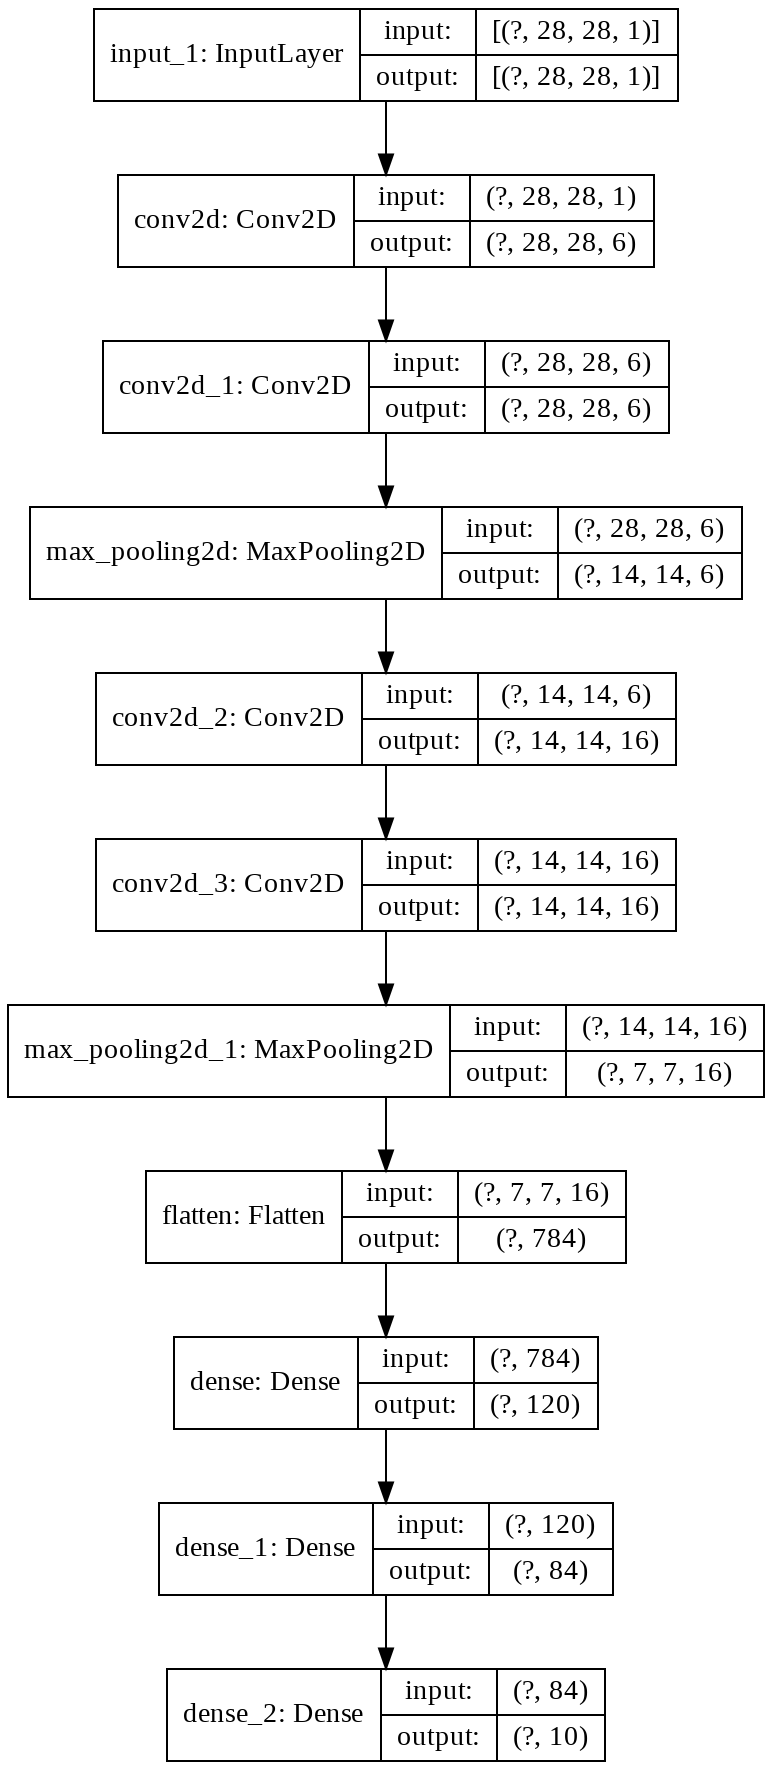

In [9]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png', expand_nested=True, dpi=144)

### 모델 1 트레이닝

In [10]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
BATCH_SIZE = 32
num_train_examples = len(train_images)

import math

history = model.fit(train_images, train_labels, epochs=10, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4257 - accuracy: 0.8458
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2982 - accuracy: 0.8914
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2659 - accuracy: 0.9041
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2442 - accuracy: 0.9113
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9168
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2202 - accuracy: 0.9202
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2126 - accuracy: 0.9230
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2055 - accuracy: 0.9240
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1998 - accuracy: 0.9264
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.193

[0.8457833528518677,
 0.8914333581924438,
 0.904116690158844,
 0.9112666845321655,
 0.916783332824707,
 0.920199990272522,
 0.9229833483695984,
 0.9240333437919617,
 0.9263833165168762,
 0.9290333390235901]

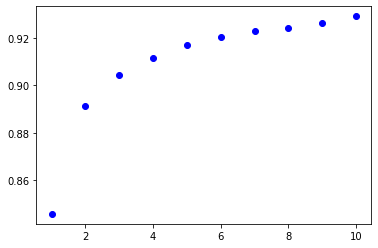

In [12]:
history_accuracy = history.history["accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.4256778955459595,
 0.298244446516037,
 0.265878289937973,
 0.24423125386238098,
 0.2298901081085205,
 0.22016091644763947,
 0.2125590443611145,
 0.2055409848690033,
 0.19980381429195404,
 0.19323675334453583]

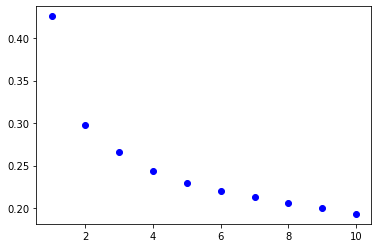

In [13]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 1 테스트 및 예측

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2645 - accuracy: 0.9100
테스트 정확도: 0.9100000262260437


In [15]:
save_model(os.path.join(gdrive_path, "cnn_classification_model_000.json"), model)

import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")
model.save_weights(os.path.join(gdrive_path, "cnn_classification_model_000__{}.hdf5".format(run_id)))

In [16]:
json_model_path = os.path.join(gdrive_path, "cnn_classification_model_000.json")
model_weight_path = os.path.join(gdrive_path, "cnn_classification_model_000__20201121-050944.hdf5")
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

예측: 9
[4.2768424e-09 6.4788971e-08 1.9744487e-08 4.4688336e-10 5.6317390e-10
 1.1219311e-03 9.8782815e-10 1.3206656e-03 2.7956543e-07 9.9755704e-01]
정답 :9
